In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

## lanscape (value function)

- landscape
- value function
- `cost` function/objective
- evaluation
    - f(x1,) 与 f(x2) 比大小，当个点更优

In [49]:
landscape = np.random.randint(1, high=50, size=(10, 10))

In [50]:
landscape

array([[31,  3, 13, 44, 35, 48, 47, 25, 25, 45],
       [12, 46, 43, 35, 17, 43, 25, 43, 14, 17],
       [23, 14, 17, 15, 49, 13, 28, 34, 40, 14],
       [32, 38, 49, 38, 26, 10, 33, 26, 39, 35],
       [32, 39, 25,  4, 18, 11, 20, 35, 23, 20],
       [44, 31, 49, 30, 26,  2, 20, 42, 10,  2],
       [21, 10, 17, 47,  8, 36, 34,  5,  6, 28],
       [45, 27, 32, 47,  2, 40, 25, 18,  5, 36],
       [32, 43,  7, 17,  5, 37, 14,  5,  2, 16],
       [49, 35, 22, 20, 21,  4, 28, 26,  5,  2]])

- 把（离散的）二维矩阵视为 z=f(x,y)
- 而 z=f(x,y) 是三维空间的一个surface（ax.plot_surface(x, y, z)）

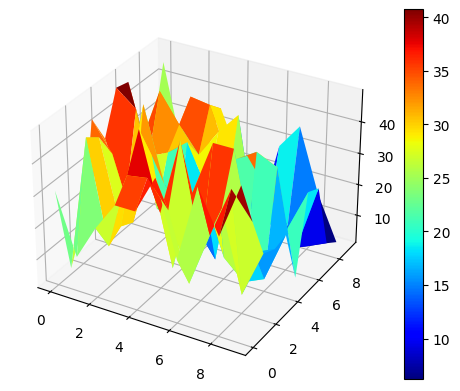

In [51]:
xs, ys = np.meshgrid(range(10), range(10))
zs = landscape[xs, ys]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xs, ys, zs, rstride=1, cstride=1, cmap=cm.jet, linewidth=0)
fig.colorbar(surf)
plt.show()

In [52]:
global_pos = np.unravel_index(np.argmax(landscape, axis=None), landscape.shape)
print(global_pos, landscape[global_pos])

(2, 4) 49


## 邻域的定义

- 2d 搜索空间的 8 邻域

In [53]:
def find_neighbors(pos, M, N):
    neighbours = []
    for dx in [-1, 0, 1]:
        for dy in [-1, 0, 1]:
            if dx == dy == 0:
                continue
            new_x, new_y = np.asarray(pos) + np.asarray([dx, dy])
            if new_x < 0 or new_x > M-1:
                continue
            if new_y < 0 or new_y > N-1:
                continue
            neighbours.append((new_x, new_y))
    return neighbours

In [54]:
neighbors([1, 2], 10, 10)

[(0, 1), (0, 2), (0, 3), (1, 1), (1, 3), (2, 1), (2, 2), (2, 3)]

In [55]:
landscape

array([[31,  3, 13, 44, 35, 48, 47, 25, 25, 45],
       [12, 46, 43, 35, 17, 43, 25, 43, 14, 17],
       [23, 14, 17, 15, 49, 13, 28, 34, 40, 14],
       [32, 38, 49, 38, 26, 10, 33, 26, 39, 35],
       [32, 39, 25,  4, 18, 11, 20, 35, 23, 20],
       [44, 31, 49, 30, 26,  2, 20, 42, 10,  2],
       [21, 10, 17, 47,  8, 36, 34,  5,  6, 28],
       [45, 27, 32, 47,  2, 40, 25, 18,  5, 36],
       [32, 43,  7, 17,  5, 37, 14,  5,  2, 16],
       [49, 35, 22, 20, 21,  4, 28, 26,  5,  2]])

In [58]:
print([0, 0], landscape[1, 2])
for pos in find_neighbors([0, 0], 10, 10):
    print(pos, landscape[pos])

[0, 0] 43
(0, 1) 3
(1, 0) 12
(1, 1) 46


## 爬山算法

- 对初始点敏感
    - 从初始点（设为当前点）出发，对其8邻域，取8邻域的最大值（局部），
        - 如果该邻域没有比当前点更大的点，搜索结束；
        - 否则沿着该邻域最大值对应的点（作为当前点），继续搜索
- （局部）极值点而非（全局）最值点
    - 凸函数/凹函数，极值点就是最值点

In [59]:
landscape

array([[31,  3, 13, 44, 35, 48, 47, 25, 25, 45],
       [12, 46, 43, 35, 17, 43, 25, 43, 14, 17],
       [23, 14, 17, 15, 49, 13, 28, 34, 40, 14],
       [32, 38, 49, 38, 26, 10, 33, 26, 39, 35],
       [32, 39, 25,  4, 18, 11, 20, 35, 23, 20],
       [44, 31, 49, 30, 26,  2, 20, 42, 10,  2],
       [21, 10, 17, 47,  8, 36, 34,  5,  6, 28],
       [45, 27, 32, 47,  2, 40, 25, 18,  5, 36],
       [32, 43,  7, 17,  5, 37, 14,  5,  2, 16],
       [49, 35, 22, 20, 21,  4, 28, 26,  5,  2]])

In [60]:
def one_hill_climb(curr_pos, landscape):
    M, N = landscape.shape
    neighbors = find_neighbors(curr_pos, M, N)
    ascended = False
    next_pos = curr_pos
    for neighbor in neighbors: #Find the neighbour with the greatest value
        if landscape[neighbor] > landscape[next_pos]:
            next_pos = neighbor
            ascended = True

    return ascended, next_pos

def hill_climb(landscape):
    M, N = landscape.shape
    init_pos = (np.random.randint(0, M), np.random.randint(0, N))
    ascending = True
    next_pos = init_pos
    iteration = 0
    while ascending:
        print('iteration {}: {}, {}'.format(iteration, next_pos, landscape[next_pos]))
        ascending, next_pos = one_hill_climb(next_pos, landscape)
        print('iteration {}: {}, {}'.format(iteration, next_pos, landscape[next_pos]))
        iteration += 1
    global_pos = np.unravel_index(np.argmax(landscape, axis=None), landscape.shape)
    print(global_pos, landscape[global_pos])

In [63]:
hill_climb(landscape)

iteration 0: (6, 3), 47
iteration 0: (5, 2), 49
iteration 1: (5, 2), 49
iteration 1: (5, 2), 49
(2, 4) 49
